In [56]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [59]:
import math

In [60]:
import yfinance as yf

In [61]:
import numpy as np

In [62]:
import pandas as pd

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
import matplotlib.pyplot as plt

In [65]:
import tensorflow as tf

In [66]:
from tensorflow import keras

In [67]:
from tensorflow.keras import layers

In [68]:
stock_data =yf.download('AAPL', start ='2019-01-01',end='2023-08-01')

[*********************100%***********************]  1 of 1 completed


In [69]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.994495,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.209953,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.670368,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.590965,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.269444,164101200


In [70]:
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

Text(0.5, 1.0, 'stock price history')

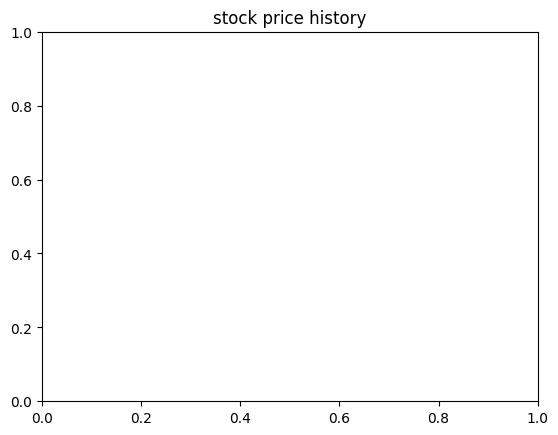

In [71]:
plt.title('stock price history')

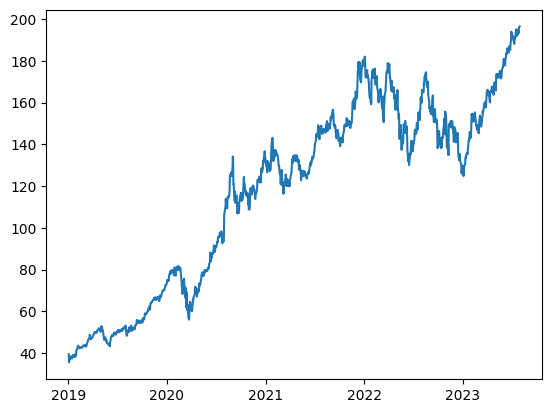

In [73]:
plt.plot(stock_data['Close'])


Text(0.5, 0, 'Data')

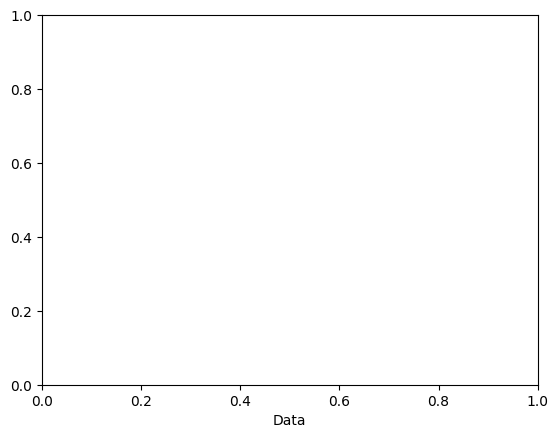

In [74]:
plt.xlabel('Data')

Text(0, 0.5, 'prices(RS)')

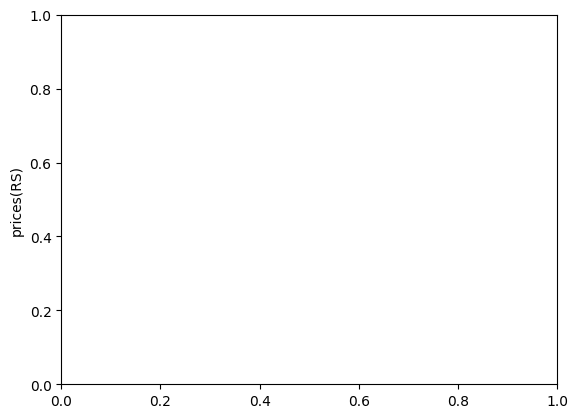

In [75]:
plt.ylabel('prices(RS)')

In [80]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [81]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [82]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
862/862 [==============================] - 17s 17ms/step - loss: 0.0033
Epoch 2/3
862/862 [==============================] - 14s 16ms/step - loss: 0.0014
Epoch 3/3
862/862 [==============================] - 14s 16ms/step - loss: 9.3662e-04


In [84]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

8/8 [==============================] - 1s 15ms/step


112.6584907034169

C:\Users\sadiq\AppData\Local\Temp\ipykernel_16328\154904543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


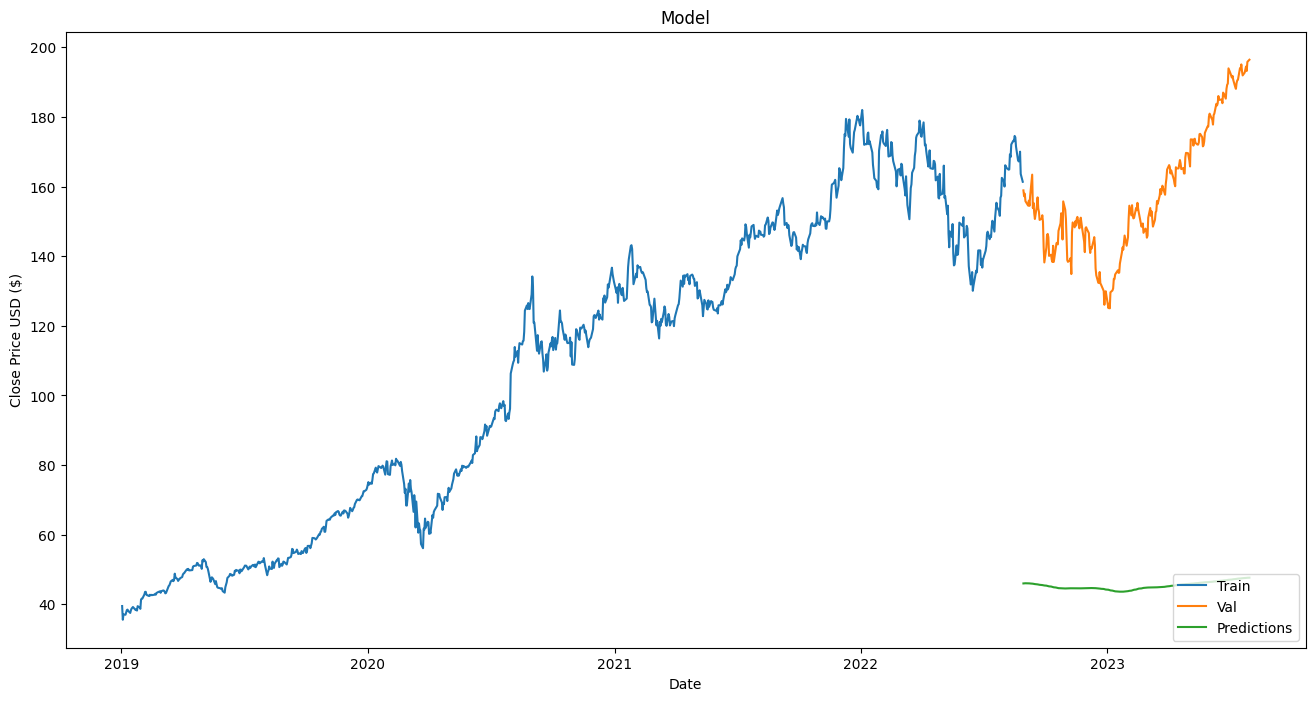

In [86]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()